In [ ]:
import numpy as np
import pandas as pd
import gdown
import matplotlib.pyplot as plt

In [ ]:
# Подключение колбэков для оптимизации обучения и сохранения результатов
from keras.callbacks import EarlyStopping, ReduceLROnPlateau, ModelCheckpoint
# Разделение данных на выборки
from sklearn.model_selection import train_test_split

from keras import utils
from keras.preprocessing.text import Tokenizer, text_to_word_sequence
from keras.preprocessing.sequence import pad_sequences
from keras.utils import to_categorical, plot_model
from keras.models import Model, Sequential
from keras.optimizers import Adam, RMSprop
from keras.layers import GlobalMaxPooling1D, Dropout, MaxPooling1D, BatchNormalization, SpatialDropout1D, Conv1D, Flatten, Dense, SimpleRNN, Concatenate, Input, concatenate, LSTM, Embedding, GRU, Bidirectional

In [ ]:
#Не нормализованные данные
#gdown.download('https://drive.google.com/uc?export=download&confirm=no_antivirus&id=1_uMKVpkYxLoTh2vRe_oxMFPa_9efkjSr', None, quiet=True)
#!unzip -q "/content/train.zip" -d /content

'train.zip'

In [ ]:
#Нормализованные данные
gdown.download('https://drive.google.com/uc?export=download&confirm=no_antivirus&id=122fBCZYewNPsJEvH2Yo7n5hJS1g9oZZs', None, quiet=True)
!unzip -q "/content/train_data_normal.zip" -d /content

In [ ]:
#df = pd.read_csv('train_data_normal.csv', sep=',', header=0, index_col=0) # Загружаем базу
df = pd.read_csv('train_data_normal.csv', sep=',', header=0, index_col=0) # Загружаем базу
df

,text,sentiment
ID,,
21098,спросить посланник аллах порицать слушание от...,1
21099,родной родный попасть гкб декабрь ехать больн...,1
21100,непорядочный отношение свой работник работать...,2
21101,отсутствовать норматив гост прочее позволить ...,1
21102,машина рука год это первый машина мочь никак ...,1
...,...,...
210984,мой юбилей отмечать ресторан астория этот рес...,2
210985,отлично встретить разместить роскошный номер ...,1
210986,быть васаби метро сенной первый ресторан оказ...,0


In [ ]:
#После нормализации и удаления стоп слов появляются пустые строки, их нужно либо удалять либо чем-то заполнять
#df=df.fillna('пропуск') #Заполняем пропуски

df=df.astype(str)

In [ ]:
maxWordsCount = 200000 #число слов, которые войдут в словарь частотности
sent_len = 180 #максимальная длина предложения (длина развернутой RNN сети)

In [ ]:
token = Tokenizer(num_words=maxWordsCount, filters='”“‘0123456789–—!"#$%&()*+,-./:;<=>?@[\\]^_`{|}~\t\n\xa0–\ufeff', lower=True, split=' ', char_level=False, oov_token = 'unknown')
token.fit_on_texts(df.text)
items=list(token.word_index.items())

In [ ]:
print(items[:50]) #Пример токенов, видно что стоп слов нет

[('unknown', 1), ('очень', 2), ('это', 3), ('отель', 4), ('год', 5), ('номер', 6), ('врач', 7), ('который', 8), ('хороший', 9), ('такой', 10), ('свой', 11), ('день', 12), ('весь', 13), ('человек', 14), ('быть', 15), ('спасибо', 16), ('сказать', 17), ('всё', 18), ('персонал', 19), ('время', 20), ('просто', 21), ('ребёнок', 22), ('так', 23), ('наш', 24), ('мой', 25), ('ресторан', 26), ('один', 27), ('завтрак', 28), ('место', 29), ('мочь', 30), ('хотеть', 31), ('сам', 32), ('первый', 33), ('большой', 34), ('цена', 35), ('другой', 36), ('центр', 37), ('клиника', 38), ('понравиться', 39), ('работать', 40), ('минута', 41), ('работа', 42), ('сделать', 43), ('новый', 44), ('отличный', 45), ('самый', 46), ('говорить', 47), ('деньга', 48), ('делать', 49), ('вид', 50)]


In [ ]:
text_seq = token.texts_to_sequences(df.text)

In [ ]:
y_train=df.sentiment

In [ ]:
print(f'Количество предложений - {len(text_seq)}')
print(f'Количество результирующих меток - {len(y_train)}')

Количество предложений - 189891
Количество результирующих меток - 189891


In [ ]:
print('Количество нейтральных отзывов  ',sum([1 for el in y_train if el==0]))
print('Количество положительных отзывов',sum([1 for el in y_train if el==1]))
print('Количество отрицательных отзывов',sum([1 for el in y_train if el==2]))

Количество нейтральных отзывов   0
Количество положительных отзывов 0
Количество отрицательных отзывов 0


In [ ]:
#функция для выравнивания данных
def alignment(x_data,y_data,n=float('inf')):
  X_train=[]
  Y_train=[]
  type1_count=0
  for i,el in enumerate(y_data):
    if el==1:
      if type1_count<n:
        X_train.append(x_data[i])
        Y_train.append(1)
        type1_count+=1
    else:
      X_train.append(x_data[i])
      Y_train.append(el)
  return X_train,Y_train

In [ ]:
X_train,Y_train = alignment(text_seq,y_train)

In [ ]:
print('Количество нейтральных отзывов  ',sum([1 for el in Y_train if el==0]))
print('Количество положительных отзывов',sum([1 for el in Y_train if el==1]))
print('Количество отрицательных отзывов',sum([1 for el in Y_train if el==2]))

Количество нейтральных отзывов   0
Количество положительных отзывов 0
Количество отрицательных отзывов 0


In [ ]:
n_len=[len(el) for el in X_train if len(el)<1000 ]

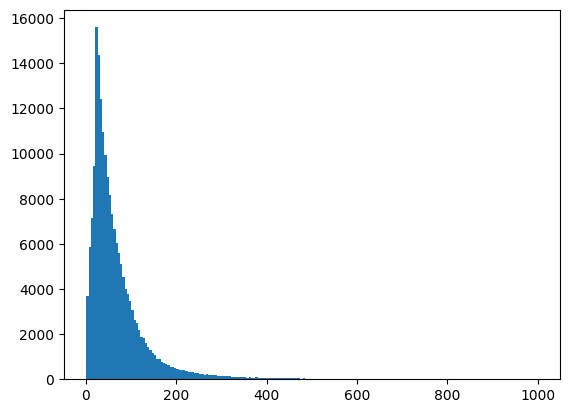

In [ ]:
plt.hist(n_len, bins=200)
plt.show()

In [ ]:
X_train = pad_sequences(X_train, maxlen=sent_len, padding='post', truncating='post') #все предложения длиной <200 дополняем нулями в конце, >200 - обрезаем


In [ ]:
print(X_train[15])
print(X_train[15].shape)
X_train.shape

[   744    739     26      2     89    683  61025 113092 113093    908
    348   4603   5611    225    359    462    296   2125      3   8232
   1984   1569   4162    737   3107   1028   9443     21  11484  11264
  26527   4377     97     19      2    162   2841    203     81   4603
     26   7854   1552      0      0      0      0      0      0      0
      0      0      0      0      0      0      0      0      0      0
      0      0      0      0      0      0      0      0      0      0
      0      0      0      0      0      0      0      0      0      0
      0      0      0      0      0      0      0      0      0      0
      0      0      0      0      0      0      0      0      0      0
      0      0      0      0      0      0      0      0      0      0
      0      0      0      0      0      0      0      0      0      0
      0      0      0      0      0      0      0      0      0      0
      0      0      0      0      0      0      0      0      0      0
      

(189891, 180)

In [ ]:
'''Замена часто втречающихся слов на 2, нужно если не удалены стоп слова'''
# n=50 #Количество слов которые можно считать не существенными
# X_train = np.where((X_train<50)&(X_train>1), 2, X_train)

In [ ]:
#Преобразование в OHE категорий
Y_train_OHE = to_categorical(Y_train, 3)
Y_train_OHE

array([[0., 1., 0.],
       [0., 1., 0.],
       [0., 0., 1.],
       ...,
       [1., 0., 0.],
       [1., 0., 0.],
       [0., 1., 0.]], dtype=float32)

In [ ]:
x_train, x_val, y_train, y_val = train_test_split(np.asarray(X_train),
                                                  np.asarray(Y_train_OHE),
                                                  test_size=0.1,
                                                  shuffle=True,
                                                  stratify=Y_train_OHE)

# Сложная трехпоточная модель

In [ ]:

# архитектура сверточного слоя:
n_conv_1 = n_conv_2  = 128
k_conv_1 = 3
k_conv_2 = 2
k_conv_3 = 4
n_lstm = 220
# архитектура полносвязанного слоя:
n_dense = 256
drop_embed=dropout = 0.25
drop_lstm = 0.2


In [ ]:
# входной слой:
input_layer = Input(shape=(sent_len,), dtype='int16', name='input')
# слой векторного представления:
embedding_layer = Embedding(maxWordsCount, sent_len, name='embedding')(input_layer)
drop_embed_layer = SpatialDropout1D(drop_embed, name='drop_embed')(embedding_layer)
# три параллельных потока:
conv_1 = Conv1D(n_conv_1, k_conv_1, activation='relu', name='conv_1')(drop_embed_layer)
maxp_1 = GlobalMaxPooling1D(name='maxp_1')(conv_1)
conv_2 = Conv1D(n_conv_2, k_conv_2, activation='relu', name='conv_2')(drop_embed_layer)
maxp_2 = GlobalMaxPooling1D(name='maxp_2')(conv_2)
lstm_3 = Bidirectional(LSTM(n_lstm, dropout=drop_lstm))(drop_embed_layer)
# объединение активаций из трех потоков:
concat = concatenate([maxp_1, maxp_2])
# скрытые полносвязанные слои:
dense_layer = Dense(n_dense, activation='relu', name='dense')(concat)
drop_dense_layer = Dropout(dropout, name='drop_dense')(dense_layer)
concat = concatenate([drop_dense_layer, lstm_3])
dense_2 = Dense(int(n_dense/4), activation='relu', name='dense_2')(concat)
dropout_2 = Dropout(dropout, name='drop_dense_2')(dense_2)
# сигмоидный выходной слой:
predictions = Dense(3, activation='sigmoid', name='output')(dropout_2)
# создание модели:
model_1 = Model(input_layer, predictions)


# Простая сверточная модель

In [ ]:
model_1 = Sequential()
model_1.add(Embedding(maxWordsCount, sent_len, input_length=sent_len)) # Формируем векторное пространство слов
model_1.add(SpatialDropout1D(0.3))                                     # "Прореживание" пространства
model_1.add(Conv1D(128, 3, activation='relu'))                         # сверточный слой
model_1.add(Conv1D(128, 3, activation='relu'))
model_1.add(GlobalMaxPooling1D())
model_1.add(Dense(64, activation='relu'))                              # полносвязанный слой
model_1.add(Dropout(0.3))
model_1.add(Dense(3, activation='sigmoid'))                            # выходной слой

# Простая модель с использованием слоя RNN

In [ ]:
#Простая модель, на последнем слое 3 нейрона
model_1 = Sequential()
model_1.add(Embedding(maxWordsCount, sent_len))
#model_1.add(GRU(256))
model_1.add(Bidirectional(LSTM(256))) #продвинутый RNN слой
model_1.add(Dense(256, activation='relu'))
model_1.add(Dense(3, activation='softmax'))

# Информация по выбранной модели

In [ ]:
model_1.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input (InputLayer)          [(None, 180)]                0         []                            
                                                                                                  
 embedding (Embedding)       (None, 180, 180)             3600000   ['input[0][0]']               
                                                          0                                       
                                                                                                  
 drop_embed (SpatialDropout  (None, 180, 180)             0         ['embedding[0][0]']           
 1D)                                                                                              
                                                                                              

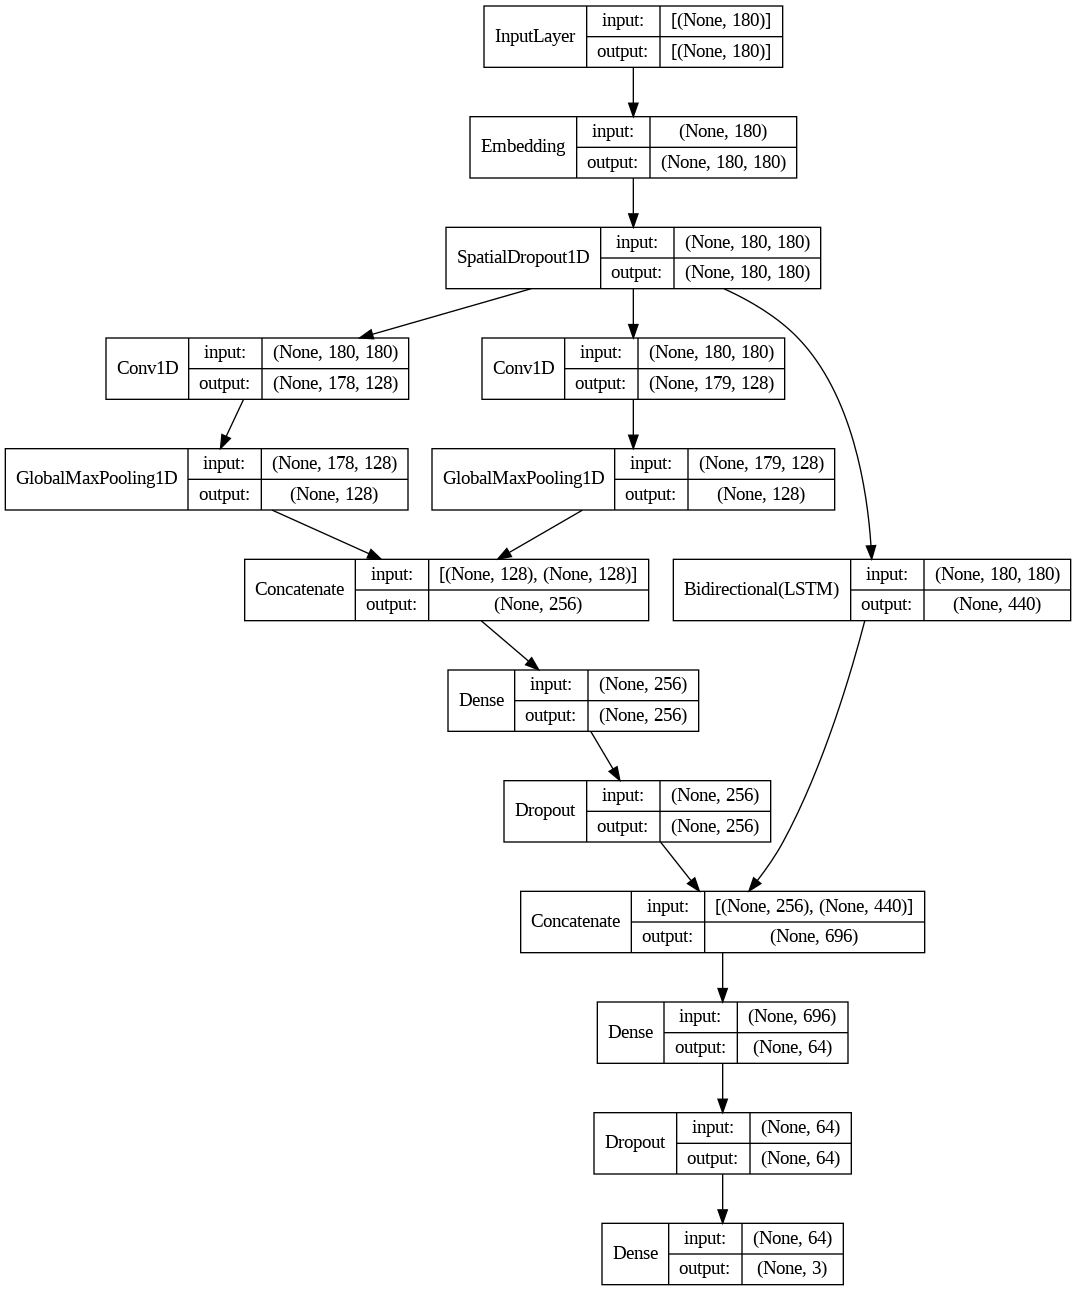

In [ ]:
utils.plot_model(model_1, show_layer_names=False, show_shapes=True)

In [ ]:
checkpoint = ModelCheckpoint("best_text_color.h5", monitor='val_loss', save_best_only=True)
model_rlr = ReduceLROnPlateau(monitor = 'val_loss', factor = 0.01, patience = 10, verbose = 1)

model_1.compile(loss='categorical_crossentropy', metrics=['AUC'], optimizer=RMSprop(learning_rate=1e-4))

In [ ]:
history = model_1.fit(x_train,
                      y_train,
                      batch_size=128,
                      epochs=30,
                      callbacks=[checkpoint, model_rlr],
                      validation_data = (x_val, y_val))


#validation_split = 0.2

Epoch 1/30
1336/1336 [==============================] - ETA: 0s - loss: 0.8386 - auc: 0.7764

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


1336/1336 [==============================] - 154s 108ms/step - loss: 0.8386 - auc: 0.7764 - val_loss: 0.6506 - val_auc: 0.8708 - lr: 1.0000e-04
Epoch 2/30
1336/1336 [==============================] - 101s 76ms/step - loss: 0.6078 - auc: 0.8814 - val_loss: 0.5823 - val_auc: 0.8919 - lr: 1.0000e-04
Epoch 3/30
1336/1336 [==============================] - 96s 72ms/step - loss: 0.5543 - auc: 0.8995 - val_loss: 0.5527 - val_auc: 0.9031 - lr: 1.0000e-04
Epoch 4/30
1336/1336 [==============================] - 91s 68ms/step - loss: 0.5230 - auc: 0.9098 - val_loss: 0.5379 - val_auc: 0.9084 - lr: 1.0000e-04
Epoch 5/30
1336/1336 [==============================] - 91s 68ms/step - loss: 0.5007 - auc: 0.9166 - val_loss: 0.5301 - val_auc: 0.9130 - lr: 1.0000e-04
Epoch 6/30
1336/1336 [==============================] - 90s 68ms/step - loss: 0.4827 - auc: 0.9219 - val_loss: 0.5366 - val_auc: 0.9142 - lr: 1.0000e-04
Epoch 7/30
1336/1336 [==============================] - 89s 67ms/step - loss: 0.4651 - auc

KeyboardInterrupt: 

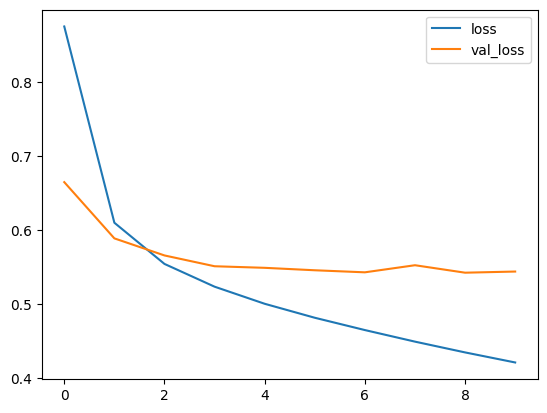

In [ ]:
plt.plot(history.history['loss'], label='loss')
plt.plot(history.history['val_loss'], label='val_loss')
plt.legend()
plt.show()

In [ ]:
#Загрузка лучших весов нейронной сети на всем периоде обучения
model_1.load_weights('/content/best_text_color.h5')

In [ ]:
# Проверка работы модели:
model_1.evaluate(x_val,y_val)

594/594 [==============================] - 6s 11ms/step - loss: 0.5206 - auc: 0.9155


[0.5205941796302795, 0.9154716730117798]

In [ ]:
import gc
gc.collect()

4308

# Работа с ТЕСТОВЫМИ данными

In [ ]:
# Обычные тестовые данные
#gdown.download('https://drive.google.com/uc?export=download&confirm=no_antivirus&id=1laWigm0cESPQ6lIOGVnXghFsmdvg0FzS', None, quiet=True)

'test.zip'

In [ ]:
#Нормализованные тестовые данные
gdown.download('https://drive.google.com/uc?export=download&confirm=no_antivirus&id=1qfR3G1YL2VbF8YMJ3y11deKFr0xPaLWF', None, quiet=True)
!unzip -q "/content/test_normal.zip" -d /content

In [ ]:
df = pd.read_csv('test_normal.csv', sep=',', header=0, index_col=0) # Загружаем базу
df

,text
ID,
0,развод деньга наблюдаться лайфклиника беремен...
1,отель выбрать рядом стадион отель номер больш...
2,вылечить гноиться рождение глазик поликлиника...
3,хороший расположение вокзал дойти пешком ночь...
4,отличный месторасположение прекрасный вид осо...
...,...
21093,несколько год назад муж останавливаться отель...
21094,спасти боль после роды появиться боль позвоно...
21095,ролик понятно один девушка наблюдатель сперет...


In [ ]:
#df=df.fillna('пропуск') #Заполняем пропуски
df=df.astype(str)

In [ ]:
test_seq = token.texts_to_sequences(df.text) #Токинизация

In [ ]:
x_test = pad_sequences(test_seq, maxlen=sent_len, padding='post', truncating='post') #все предложения длиной <200 дополняем нулями в конце, >200 - обрезаем
#x_test = np.where((x_test<50)&(x_test>1), 2, x_test)
print(x_test[0])
print(x_test[0].shape)
x_test.shape

[2112   48  765    1  474 2112   48    7  139  510  517 1219 3658  611
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0]
(180,)


(21098, 180)

In [ ]:
currPred=model_1.predict(x_test) #Предикт

660/660 [==============================] - 6s 8ms/step


In [ ]:
print(df.text[3])
print(np.argmax(currPred[3]))

 хороший расположение вокзал дойти пешком ночью очень тихо хотя центр рядом наш номер башня размер комната минимальный практически кровать такой ванная верный душа более скромно особо чисто зато дивный вид окно хороший бельё завтрак звезда очень скромный бесплатный тормозить соотношение цена качество польза отель цена раз ниже адекватный
0


In [ ]:
#Для просмотра количества классов
n=0 #Класс
for i, cp in enumerate(currPred):
  if np.argmax(cp)==0:
    n+=1
n

5366

In [ ]:
rez = [ np.argmax(el) for i,el in enumerate(currPred)]

In [ ]:
df_rez = pd.DataFrame(rez, columns = ['sentiment'])

In [ ]:
df_rez.to_csv ('1result_best.csv', index= True)